# Find Alpha with moment balence  

## Imports

In [111]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aerosandbox as asb
import aerosandbox.numpy as np
from Create_airplane import Create_airplane_x_sections

## Create the model

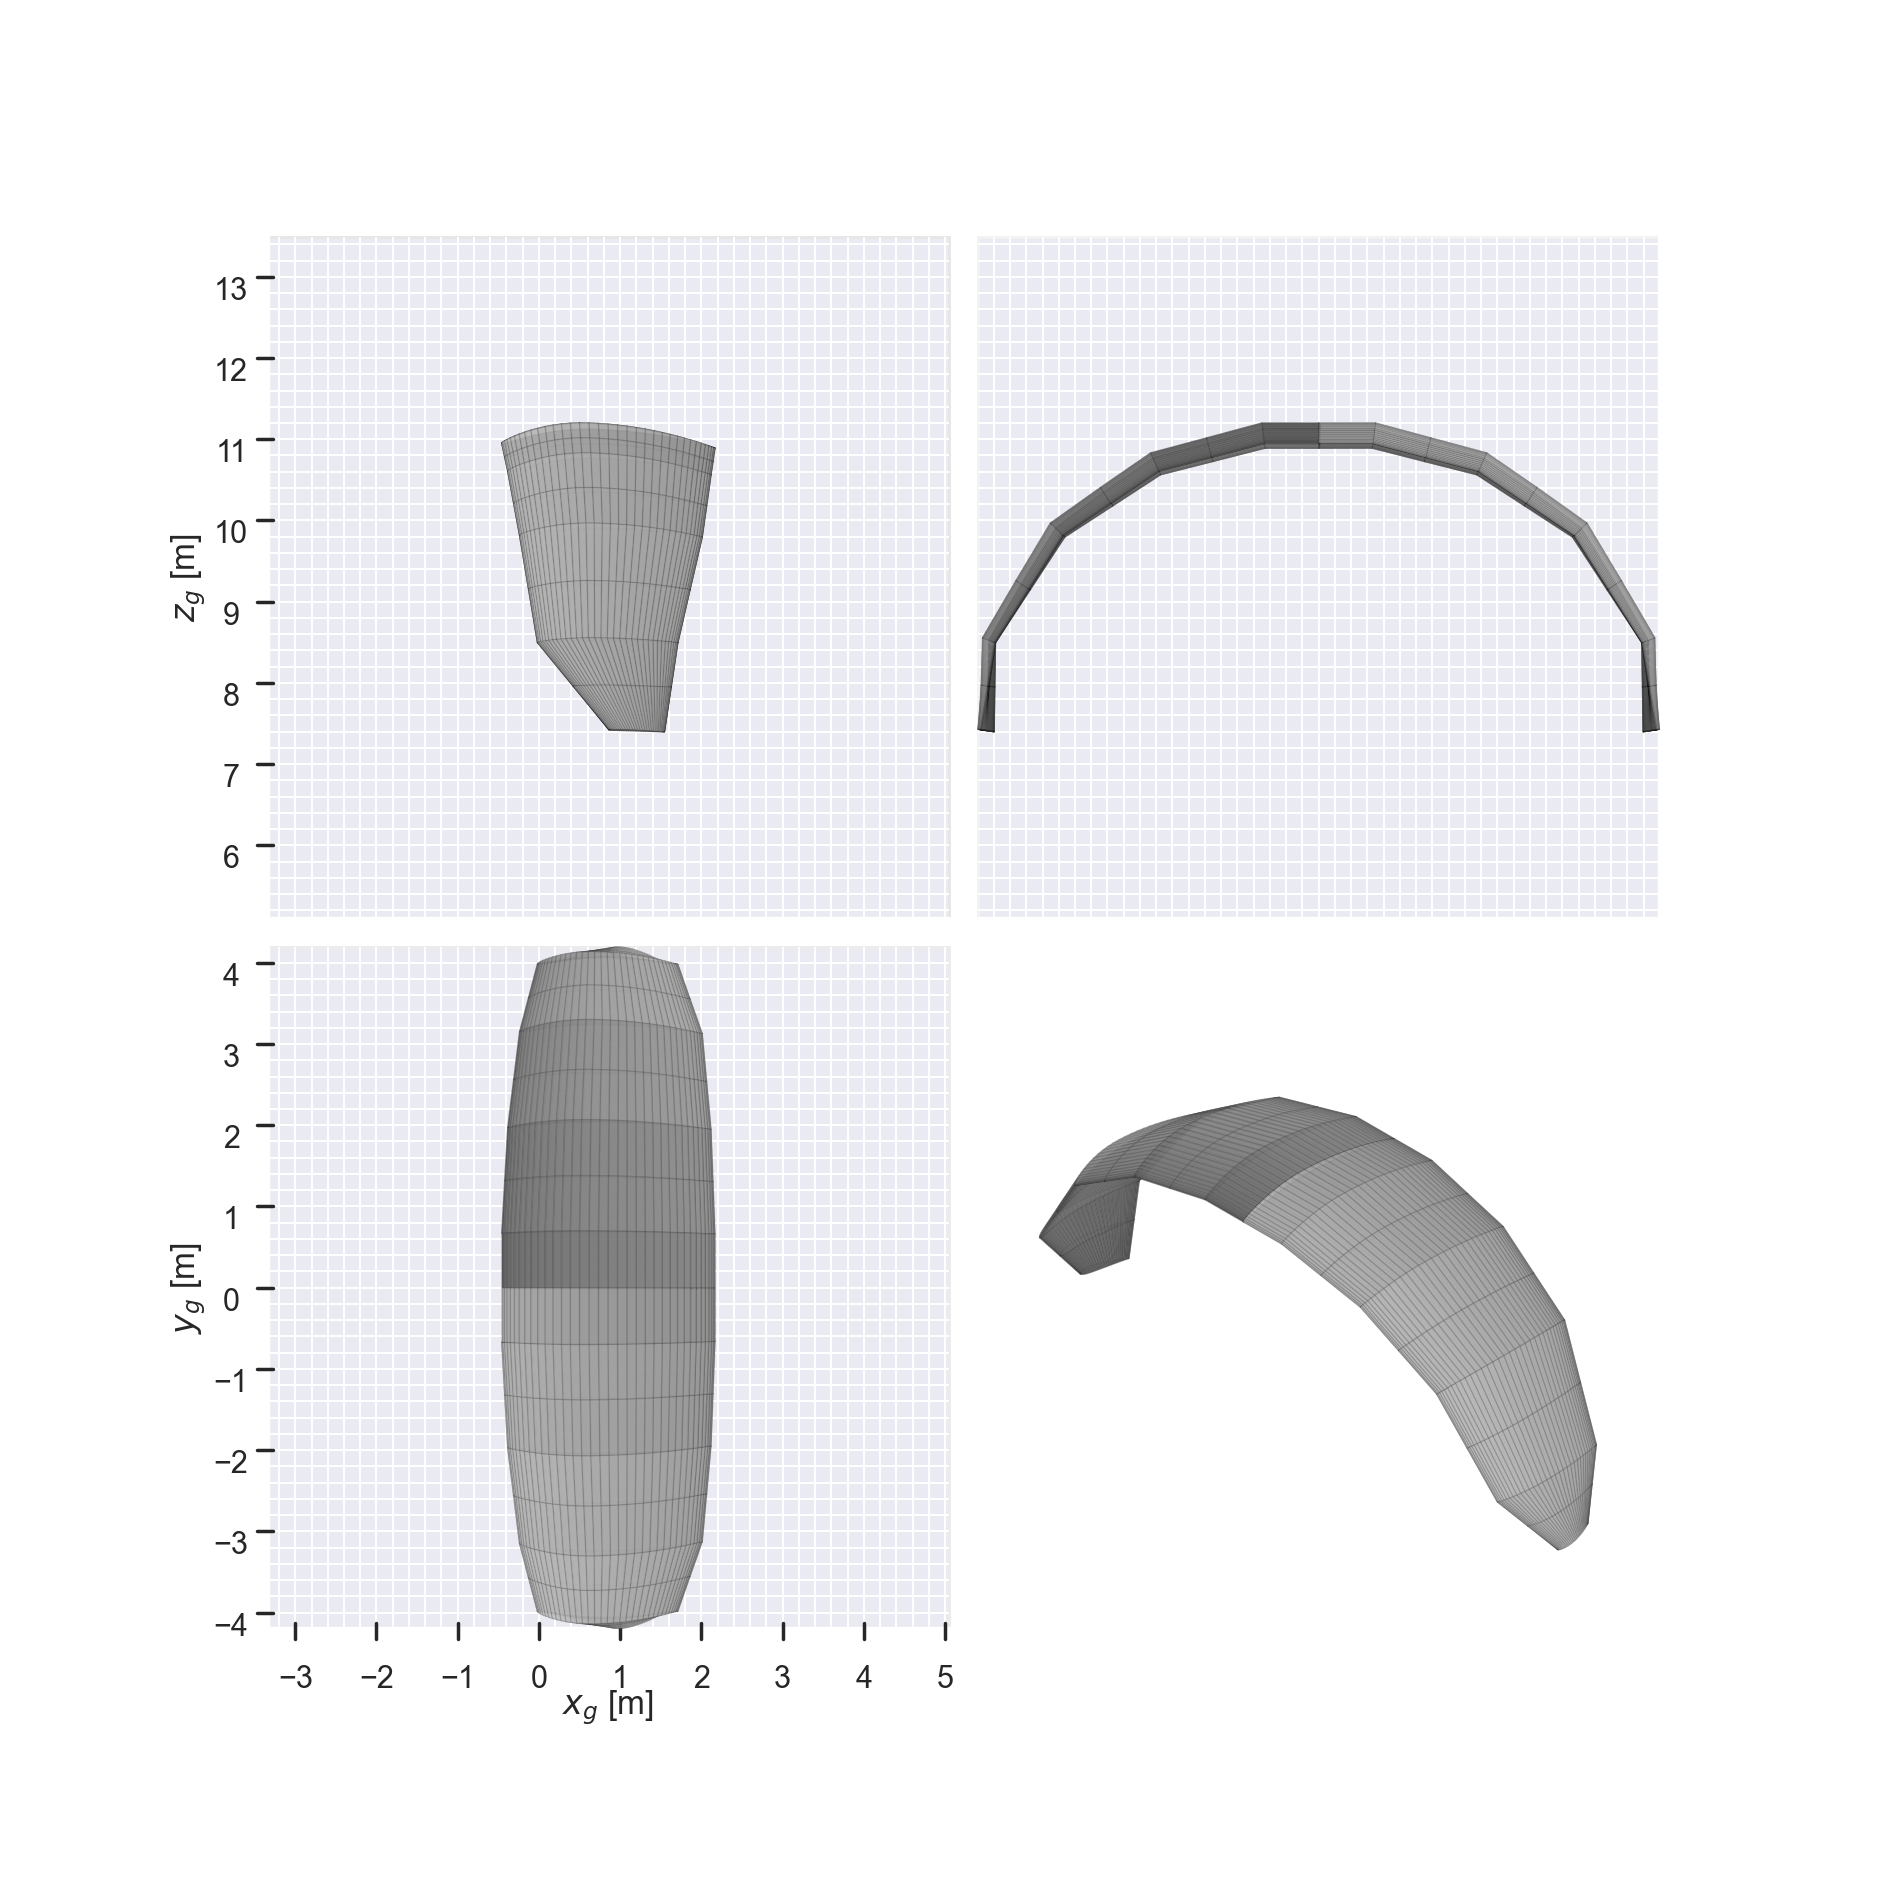

array([[<Axes3D: zlabel='$z_g$ [m]'>, <Axes3D: >],
       [<Axes3D: xlabel='$x_g$ [m]', ylabel='$y_g$ [m]'>, <Axes3D: >]],
      dtype=object)

In [112]:
# %% Import airplane from CSV file
foldername = "VSM_kite/rib_list_from_CAD_LE_TE_and_surfplan_d_tube_camber_19ribs_modified.csv"
csv_file_path = os.path.join(os.getcwd(),"Kites",foldername)

# %% Get the airplane parameters and create airfoils from NACA 4 digits
(x_le, y_le, z_le, chords, twists, N, A, CA) = np.loadtxt(csv_file_path, delimiter=",", skiprows=1, unpack=True)

NACA = ["naca"+str(int(N[i])) + str(int(A[i])) + str(int(CA[i])) for i in range(len(N))]
for i in range(len(NACA)) : 
    if len(NACA[i])==7 :
        NACA[i] = NACA[i][:6]+"0"+NACA[i][6:]

NACA_airfoil = [ asb.Airfoil(name=naca) for naca in NACA]

# %% Create the airplane
airplane_delft = Create_airplane_x_sections(
    x_le= x_le,
    y_le= -y_le, # Needs to be inverted
    z_le= z_le,
    chords= chords,
    twists= twists,
    wing_airfoil= NACA_airfoil,
)
airplane_delft.draw_three_view()

## Parameters

In [113]:
atmo = asb.Atmosphere(altitude=0)
velocity = 15 # m/s

# %% Vlm
chordwise_resolution = 8

# %% Airplane
aerodynamic_center = airplane_delft.aerodynamic_center()
dynamic_pressure = 0.5 * atmo.density() * velocity**2
Re = (
                atmo.density()
                * velocity
                * airplane_delft.wings[0].mean_aerodynamic_chord()
                / atmo.dynamic_viscosity()
            )

## Simulate

In [114]:
# %% Simulate
vlm_result = []
for alpha in range(26) :
    vlm = asb.VortexLatticeMethod(
        chordwise_resolution=chordwise_resolution,
        spanwise_resolution=1,
        spanwise_spacing_function=np.linspace,
        airplane=airplane_delft,
        op_point=asb.OperatingPoint(
            velocity=velocity,  # m/s
            alpha=alpha,  # degree
        ),
    )

    vlm_result.append(vlm.run())

## Analysis

Plot

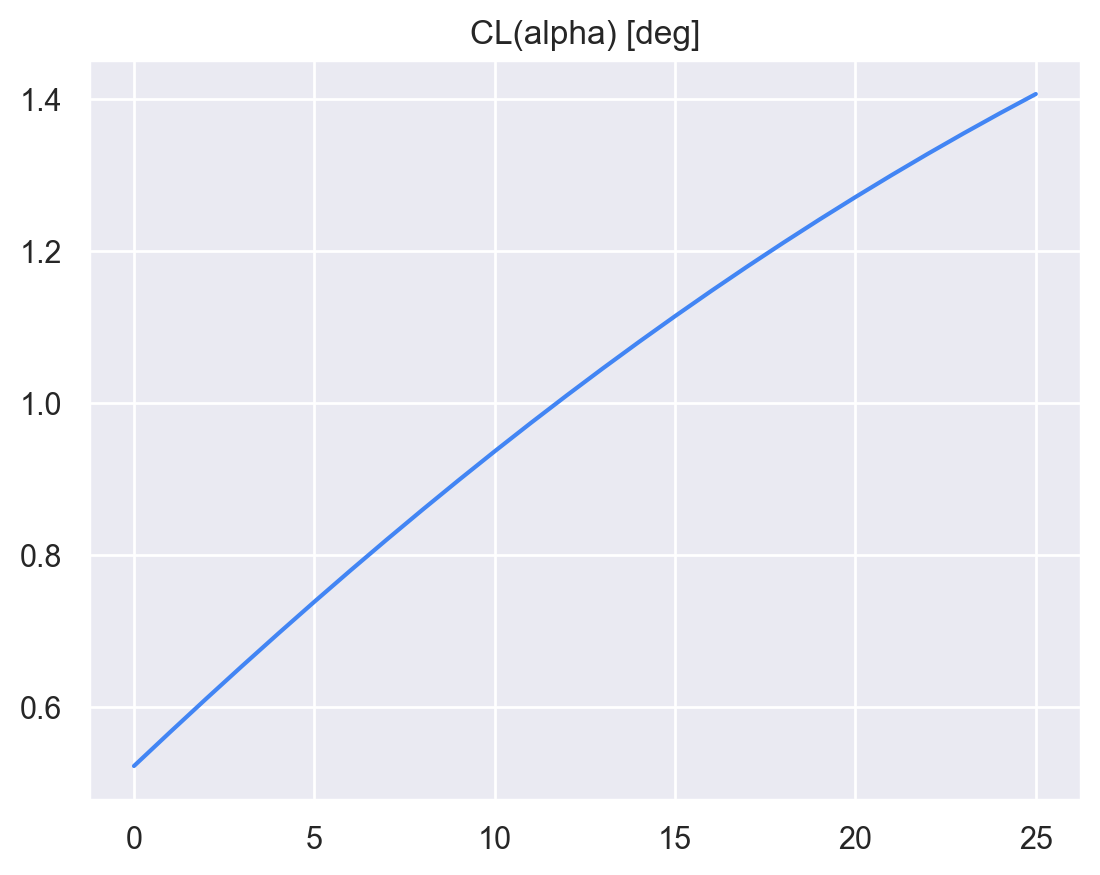

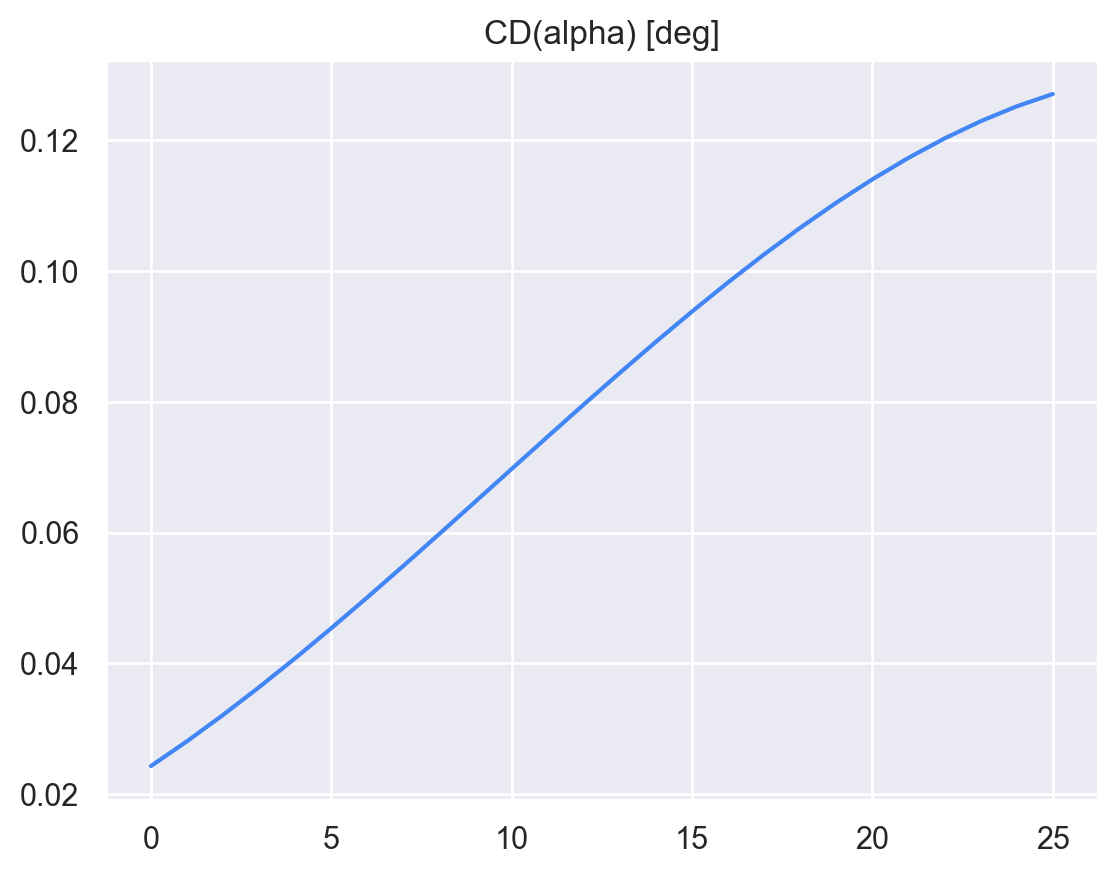

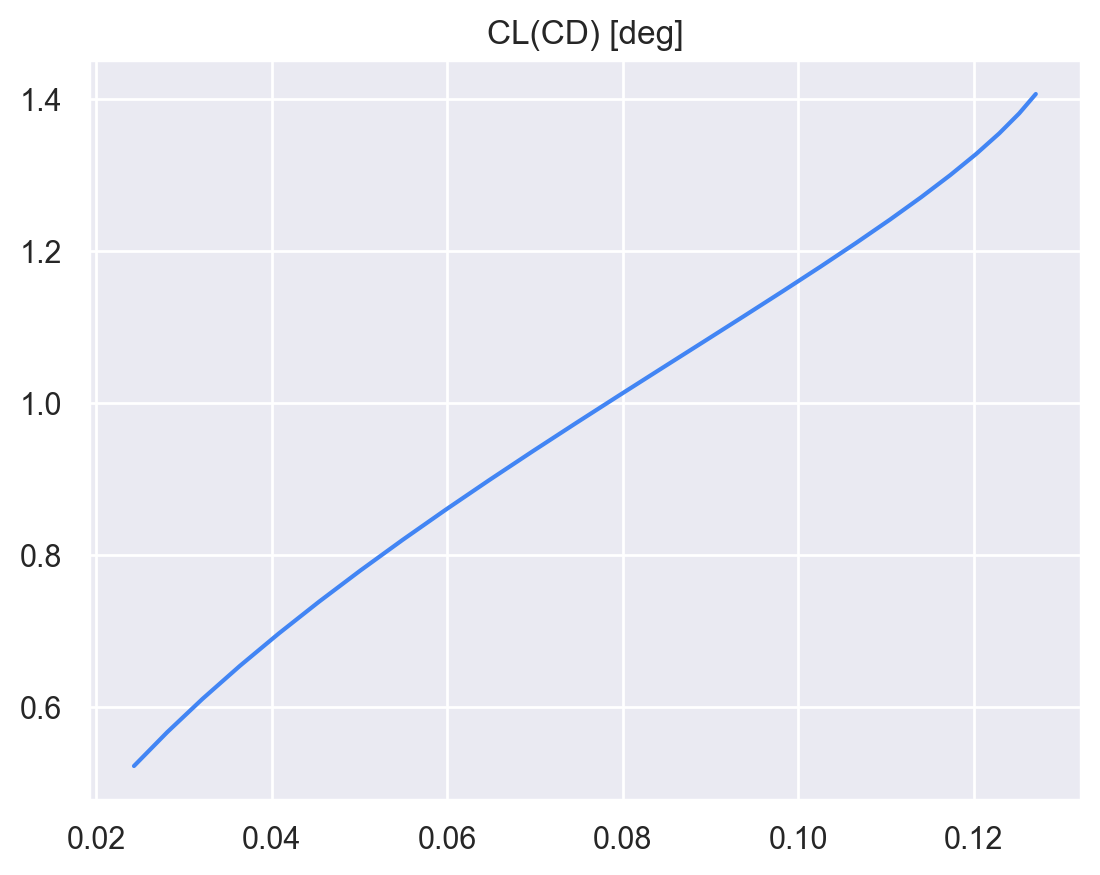

In [117]:
alpha = [alpha for alpha in range(26)]
CL = [result["CL"] for result in vlm_result]
CD = [result["CD"] for result in vlm_result]

# %% CL
ax_CL = sns.lineplot( x=alpha, y=CL)
ax_CL.set_title("CL(alpha) [deg]")
plt.show()

# %% CD
ax_CD = sns.lineplot( x=alpha, y=CD)
ax_CD.set_title("CD(alpha) [deg]")
plt.show()

# %% CL/CD
ax_CLCD = sns.lineplot( x=CD, y=CL)
ax_CLCD.set_title("CL(CD) [deg]")
plt.show()